# Prepare

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd  /content/drive/MyDrive/CS506/Spark
%ls
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from scipy import stats

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CS506/Spark
DailyWeights.csv  date_temperature.csv  devs.csv        warren_trash.csv
Data/             devices.csv           trash_data.csv  weather.csv


In [31]:
dw = pd.read_csv('DailyWeights.csv')
dw = dw[dw['Customer Key']>0]
dw['Customer Key'] = dw['Customer Key'].astype('int32')
dw.head()

,Customer Key,Location,Address,Work Order Date,Material,Tons
0,31582,200 Riverway,200 Riverway,6/27/2022,Trash,1.88
1,31582,200 Riverway,200 Riverway,6/9/2022,Trash,2.13
2,31582,200 Riverway,200 Riverway,5/24/2022,Trash,2.60
3,31582,200 Riverway,200 Riverway,5/14/2022,Trash,2.95
4,31582,200 Riverway,200 Riverway,5/7/2022,Trash,2.99


In [32]:
import pandas as pd

# Assuming you already have the dw dataframe

# Try converting the 'Work Order Date' column to datetime objects, and store it as a new column 'Parsed Date'
dw['Parsed Date'] = pd.to_datetime(dw['Work Order Date'], format='%m/%d/%Y', errors='coerce')

# Filter the dataframe to only keep rows where 'Parsed Date' is not NaT
dw_filtered = dw.dropna(subset=['Parsed Date'])

# Sort the dataframe by the 'Parsed Date' column in ascending order (earliest date first)
dw_sorted = dw_filtered.sort_values(by='Parsed Date')

# Drop the 'Parsed Date' column as it's not needed anymore
dw = dw_sorted.drop(columns=['Parsed Date'])

dw.head()


,Customer Key,Location,Address,Work Order Date,Material,Tons
9137,31903,BU #75 - College of Health,635 Commonwealth Ave,7/1/2021,Recycling,0.0300
11980,31950,BU #99 - College of Fine Arts,855 COMMONWEALTH AVE,7/2/2021,Recycling,0.0800
18068,32111,BU MED- 815 Albany,815 Albany Street,7/6/2021,Compost,0.0725
148,31769,BU #2 - Student Village,10 BUICK STREET,7/6/2021,Recycling,0.5670
11503,31946,BU #95 - 80 Ivy,80 IVY ST,7/6/2021,Trash,0.0470


In [33]:
dw = dw[['Location','Tons']]
dw = dw.groupby('Location').sum().reset_index()
dw.head()

,Location,Tons
0,10 Buick - OCC,3.1565
1,126 BSR - OCC,3.9455
2,140 BSR - OCC,3.1565
3,154 BSR - OCC,3.1565
4,161-163 BSR - OCC,3.9455


In [35]:
dw = dw.sort_values(by='Tons')
dw

,Location,Tons
136,BU SECURE- 25 Pilgrim,0.0380
41,BU #120 - 745 Comm Ave,0.0750
150,BU- Nickerson Event,0.4900
13,455-457 Park - OCC,0.7870
39,BU #116 - 1 Silber Way,1.1900
...,...,...
130,BU MED- 15 Stoughton,231.2015
74,BU #43 - West Loading Dock,265.0505
107,BU #82 - Warren Towers,294.6075
119,BU #93 - George Sherman Union,302.5935


In [ ]:
pd.to_datetime(dw['Work Order Date']).max()

Timestamp('2022-06-30 00:00:00')

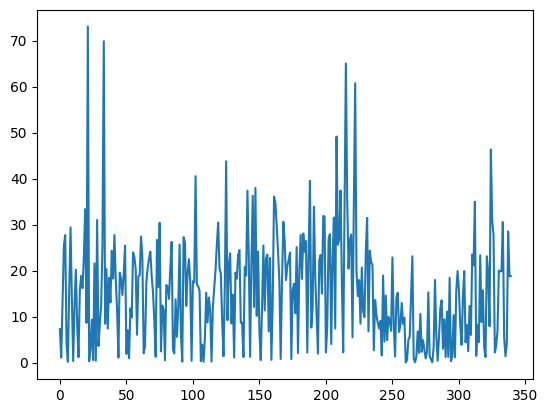

In [25]:
import matplotlib.pyplot as plt
plt.plot(dw['Tons'])
plt.show()

In [ ]:
type(dw['Work Order Date'][0])

str

In [ ]:
set(warren['Material'])

{'Compost', 'Recycling', 'Trash'}

In [ ]:
warren_trash = warren[warren['Material']=='Trash']
warren_recycle = warren[warren['Material']=='Recycling']
warren_compost = warren[warren['Material']=='Compost']

In [ ]:
warren_recycle.shape

(191, 6)

In [ ]:
warren_trash.shape

(64, 6)

In [ ]:
warren_trash.to_csv('trash_data.csv',index=False)

NameError: ignored

In [ ]:
warren_trash

,Customer Key,Location,Address,Work Order Date,Material,Tons
9983,31911,BU #82 - Warren Towers,700 COMMONWEALTH AVE,6/27/2022,Trash,1.75
9984,31911,BU #82 - Warren Towers,700 COMMONWEALTH AVE,6/20/2022,Trash,1.24
9985,31911,BU #82 - Warren Towers,700 COMMONWEALTH AVE,6/13/2022,Trash,2.11
9986,31911,BU #82 - Warren Towers,700 COMMONWEALTH AVE,6/6/2022,Trash,2.52
9987,31911,BU #82 - Warren Towers,700 COMMONWEALTH AVE,5/31/2022,Trash,2.07
...,...,...,...,...,...,...
10042,31911,BU #82 - Warren Towers,700 COMMONWEALTH AVE,9/22/2021,Trash,9.89
10043,31911,BU #82 - Warren Towers,700 COMMONWEALTH AVE,9/11/2021,Trash,8.59
10044,31911,BU #82 - Warren Towers,700 COMMONWEALTH AVE,9/2/2021,Trash,9.46
10045,31911,BU #82 - Warren Towers,700 COMMONWEALTH AVE,7/26/2021,Trash,4.32


In [ ]:
warren_compost

In [ ]:
import pandas as pd
import numpy as np

# Assuming your data is stored in a CSV file called 'trash_data.csv'
trash_data = pd.read_csv('trash_data.csv')

trash_data['Work Order Date'] = pd.to_datetime(trash_data['Work Order Date'])

# Create a new DataFrame with all the dates between the minimum and maximum dates
min_date = pd.to_datetime('2021-07-21')
max_date = pd.to_datetime('2022-06-27')
all_dates = pd.date_range(min_date, max_date, freq='D')

all_dates_df = pd.DataFrame({'Work Order Date': all_dates})

# Merge the original dataset with the new DataFrame, filling the missing values with NaN
merged_data = pd.merge(all_dates_df, trash_data, on='Work Order Date', how='left')

# Forward fill the trash output and divide it by the interval
merged_data['Output Filled'] = merged_data['Tons'].fillna(method='ffill')
merged_data['Interval'] = merged_data['Work Order Date'].diff().fillna(pd.Timedelta(days=1)).dt.days
merged_data['Daily Output'] = merged_data['Output Filled'] / merged_data['Interval']


In [ ]:
import pandas as pd

# Assuming your data is stored in a CSV file called 'trash_data.csv'
trash_data = pd.read_csv('trash_data.csv')

trash_data['Work Order Date'] = pd.to_datetime(trash_data['Work Order Date'])

# Calculate the interval between consecutive trash extraction dates
trash_data['Interval'] = -trash_data['Work Order Date'].diff().dt.days

# Divide the trash output by the interval
trash_data['Daily Output'] = trash_data['Tons'] / trash_data['Interval']
trash_data

,Customer Key,Location,Address,Work Order Date,Material,Tons,Interval,Daily Output
0,31911,BU #82 - Warren Towers,700 COMMONWEALTH AVE,2022-06-27,Trash,1.75,NaN,NaN
1,31911,BU #82 - Warren Towers,700 COMMONWEALTH AVE,2022-06-20,Trash,1.24,7.0,0.177143
2,31911,BU #82 - Warren Towers,700 COMMONWEALTH AVE,2022-06-13,Trash,2.11,7.0,0.301429
3,31911,BU #82 - Warren Towers,700 COMMONWEALTH AVE,2022-06-06,Trash,2.52,7.0,0.360000
4,31911,BU #82 - Warren Towers,700 COMMONWEALTH AVE,2022-05-31,Trash,2.07,6.0,0.345000
...,...,...,...,...,...,...,...,...
59,31911,BU #82 - Warren Towers,700 COMMONWEALTH AVE,2021-09-22,Trash,9.89,7.0,1.412857
60,31911,BU #82 - Warren Towers,700 COMMONWEALTH AVE,2021-09-11,Trash,8.59,11.0,0.780909
61,31911,BU #82 - Warren Towers,700 COMMONWEALTH AVE,2021-09-02,Trash,9.46,9.0,1.051111
62,31911,BU #82 - Warren Towers,700 COMMONWEALTH AVE,2021-07-26,Trash,4.32,38.0,0.113684


In [ ]:
trash_data[['Work Order Date', 'Tons','Daily Output']].dropna().to_csv('warren_trash.csv',index=False)

In [ ]:
trash_data[['Work Order Date','Daily Output']].dropna()

,Work Order Date,Tons,Daily Output
1,2022-06-20,1.24,0.177143
2,2022-06-13,2.11,0.301429
3,2022-06-06,2.52,0.360000
4,2022-05-31,2.07,0.345000
5,2022-05-26,1.19,0.238000
...,...,...,...
59,2021-09-22,9.89,1.412857
60,2021-09-11,8.59,0.780909
61,2021-09-02,9.46,1.051111
62,2021-07-26,4.32,0.113684


In [ ]:
new = trash_data[['Work Order Date','Daily Output']].dropna()
new.head()

,Work Order Date,Daily Output
1,2022-06-20,0.177143
2,2022-06-13,0.301429
3,2022-06-06,0.360000
4,2022-05-31,0.345000
5,2022-05-26,0.238000


In [ ]:
new.shape

(63, 2)

In [ ]:
import pandas as pd
df = new

# Convert the 'Work Order Date' column to datetime
df['Work Order Date'] = pd.to_datetime(df['Work Order Date'])

# Set the DataFrame index to the 'Work Order Date' column
df.set_index('Work Order Date', inplace=True)

# Create a new date range covering all days between the first and last dates in the data
new_date_range = pd.date_range(start=df.index.min(), end=df.index.max())

# Reindex the DataFrame with the new date range
df_expanded = df.reindex(new_date_range)

# Forward-fill missing values in the 'Daily Output' column
df_expanded['Daily Output'].fillna(method='ffill', inplace=True)

# Reset the index of the resulting DataFrame
df_expanded.reset_index(inplace=True)
df_expanded.columns = ['Work Order Date', 'Daily Output']

print(df_expanded)


    Work Order Date  Daily Output
0        2021-07-21      0.632000
1        2021-07-22      0.632000
2        2021-07-23      0.632000
3        2021-07-24      0.632000
4        2021-07-25      0.632000
..              ...           ...
330      2022-06-16      0.301429
331      2022-06-17      0.301429
332      2022-06-18      0.301429
333      2022-06-19      0.301429
334      2022-06-20      0.177143

[335 rows x 2 columns]


In [ ]:
df_expanded.to_csv('warren_trash.csv',index=False)

In [ ]:
df_expanded.shape

(335, 2)

In [ ]:
trash_data.columns

Index(['Customer Key', 'Location', 'Address', 'Work Order Date', 'Material',
       'Tons', 'Interval', 'Daily Output'],
      dtype='object')

In [ ]:
df_expanded

,Work Order Date,Daily Output
0,2021-07-21,0.632000
1,2021-07-22,0.632000
2,2021-07-23,0.632000
3,2021-07-24,0.632000
4,2021-07-25,0.632000
...,...,...
330,2022-06-16,0.301429
331,2022-06-17,0.301429
332,2022-06-18,0.301429
333,2022-06-19,0.301429


# make dataset

In [ ]:
df = pd.read_csv('warren_trash.csv')
df['Work Order Date'] = pd.to_datetime(df['Work Order Date'])
df.head()

In [ ]:
# Extract the month, day, and weekday from the 'Work Order Date' column
df['Month'] = df['Work Order Date'].dt.month
df['Day'] = df['Work Order Date'].dt.day
df['Weekday'] = df['Work Order Date'].dt.dayofweek

df.head()



,Work Order Date,Daily Output,Month,Day,Weekday
0,2021-07-21,0.632,7,21,2
1,2021-07-22,0.632,7,22,3
2,2021-07-23,0.632,7,23,4
3,2021-07-24,0.632,7,24,5
4,2021-07-25,0.632,7,25,6


In [ ]:
df.rename(columns={'Work Order Date': 'Date'}, inplace=True)
df

,Date,Daily Output,Month,Day,Weekday
0,2021-07-21,0.632000,7,21,2
1,2021-07-22,0.632000,7,22,3
2,2021-07-23,0.632000,7,23,4
3,2021-07-24,0.632000,7,24,5
4,2021-07-25,0.632000,7,25,6
...,...,...,...,...,...
330,2022-06-16,0.301429,6,16,3
331,2022-06-17,0.301429,6,17,4
332,2022-06-18,0.301429,6,18,5
333,2022-06-19,0.301429,6,19,6


In [ ]:
df.rename(columns={'Daily Output':'Trash'}, inplace=True)
df

In [ ]:
df.to_csv('warren_trash.csv',index=False)

In [ ]:
df = pd.read_csv('warren_trash.csv')
weather = pd.read_csv('weather.csv')
weather = weather[['DATE', 'AWND',
       'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WSF2']]
weather.head()

,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2
0,2021-01-01,6.26,0.10,0.0,34.0,36.0,29.0,320.0,17.0
1,2021-01-02,14.32,0.41,0.0,39.0,42.0,32.0,310.0,28.0
2,2021-01-03,9.40,0.03,0.2,33.0,36.0,29.0,20.0,17.0
3,2021-01-04,11.41,0.00,0.0,34.0,39.0,31.0,30.0,17.0
4,2021-01-05,10.74,0.01,0.0,32.0,33.0,30.0,340.0,15.0


In [ ]:
df.head()


,Date,Daily Output,Month,Day,Weekday,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2
0,2021-07-21,0.632,7,21,2,9.40,0.00,0.0,78.0,84.0,68.0,320.0,21.0
1,2021-07-22,0.632,7,22,3,8.05,0.00,0.0,72.0,78.0,65.0,220.0,17.0
2,2021-07-23,0.632,7,23,4,7.61,0.00,0.0,73.0,80.0,69.0,90.0,14.1
3,2021-07-24,0.632,7,24,5,8.50,0.00,0.0,72.0,77.0,64.0,100.0,14.1
4,2021-07-25,0.632,7,25,6,11.18,0.15,0.0,72.0,76.0,69.0,220.0,25.1


In [ ]:

# Ensure the 'DATE' and 'Date' columns are in datetime format
weather['DATE'] = pd.to_datetime(weather['DATE'])
df['Date'] = pd.to_datetime(df['Date'])

# Merge the DataFrames by the 'DATE' and 'Date' columns
merged_df = df.merge(weather, left_on='Date', right_on='DATE')
merged_df.drop(columns='DATE',inplace=True)

merged_df.head()

In [ ]:
merged_df.shape

(335, 13)

In [ ]:
df

In [ ]:
merged_df.to_csv('warren_trash.csv',index=False)

In [ ]:
df.to_csv('warren_trash.csv',index=False)

In [ ]:
from datetime import datetime

def get_period(date):
    summer_2021_start = datetime.strptime("2021-05-24", "%Y-%m-%d")
    summer_2021_end = datetime.strptime("2021-08-13", "%Y-%m-%d")
    fall_2021_start = datetime.strptime("2021-09-02", "%Y-%m-%d")
    fall_2021_end = datetime.strptime("2021-12-18", "%Y-%m-%d")
    spring_2022_start = datetime.strptime("2022-01-20", "%Y-%m-%d")
    spring_2022_end = datetime.strptime("2022-05-13", "%Y-%m-%d")
    summer_1_2022_start = datetime.strptime("2022-05-24", "%Y-%m-%d")
    summer_1_2022_end = datetime.strptime("2022-07-01", "%Y-%m-%d")
    summer_2_2022_start = datetime.strptime("2022-07-05", "%Y-%m-%d")
    summer_2_2022_end = datetime.strptime("2022-08-12", "%Y-%m-%d")

    if (summer_2021_start <= date <= summer_2021_end) or (summer_1_2022_start <= date <= summer_1_2022_end) or (summer_2_2022_start <= date <= summer_2_2022_end):
        return 2
    elif (fall_2021_start <= date <= fall_2021_end) or (spring_2022_start <= date <= spring_2022_end):
        return 1
    else:
        return 0

# Apply the get_period function to the DataFrame
df["Period"] = df["Date"].apply(lambda x: get_period(datetime.strptime(x, "%Y-%m-%d")))
df.head()

,Date,Trash,Month,Day,Weekday,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2,Period
0,2021-07-21,0.632,7,21,2,9.40,0.00,0.0,78.0,84.0,68.0,320.0,21.0,2
1,2021-07-22,0.632,7,22,3,8.05,0.00,0.0,72.0,78.0,65.0,220.0,17.0,2
2,2021-07-23,0.632,7,23,4,7.61,0.00,0.0,73.0,80.0,69.0,90.0,14.1,2
3,2021-07-24,0.632,7,24,5,8.50,0.00,0.0,72.0,77.0,64.0,100.0,14.1,2
4,2021-07-25,0.632,7,25,6,11.18,0.15,0.0,72.0,76.0,69.0,220.0,25.1,2


In [ ]:
df = pd.read_csv('warren_trash.csv')
df.head()

,Date,Trash,Month,Day,Weekday,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2,Period
0,2021-07-21,0.632,7,21,2,9.40,0.00,0.0,78.0,84.0,68.0,320.0,21.0,2
1,2021-07-22,0.632,7,22,3,8.05,0.00,0.0,72.0,78.0,65.0,220.0,17.0,2
2,2021-07-23,0.632,7,23,4,7.61,0.00,0.0,73.0,80.0,69.0,90.0,14.1,2
3,2021-07-24,0.632,7,24,5,8.50,0.00,0.0,72.0,77.0,64.0,100.0,14.1,2
4,2021-07-25,0.632,7,25,6,11.18,0.15,0.0,72.0,76.0,69.0,220.0,25.1,2


#LGBM

In [ ]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['Date',"Trash"])
y = df["Trash"]

# Split the dataset into training and testing sets
n_samples = len(X)
test_size = int(0.25 * n_samples)
train_start = test_size
train_end = n_samples - test_size

# Create training and test sets using the calculated indices
X_train, X_test = X.iloc[:train_end], X.iloc[train_end:]
y_train, y_test = y.iloc[:train_end], y.iloc[train_end:]

# Create and train the LightGBM model
model = LGBMRegressor()
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.10088451730366607


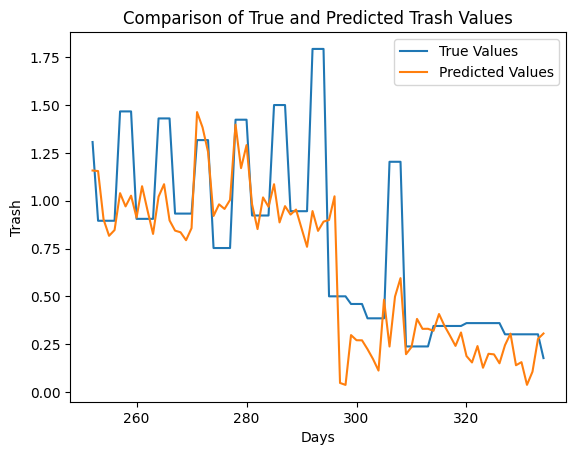

In [ ]:
import matplotlib.pyplot as plt

# Create the line plot
fig, ax = plt.subplots()

# Plot the true and predicted values
ax.plot(y_test.index, y_test, label="True Values",)
ax.plot(y_test.index, y_pred, label="Predicted Values",)

# Add a legend, labels, and a title
ax.legend()
ax.set_xlabel("Days")
ax.set_ylabel("Trash")
ax.set_title("Comparison of True and Predicted Trash Values")

# Show the plot
plt.show()


#GRU

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out


In [ ]:
df.head()

,Date,Trash,Month,Day,Weekday,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2,Period
0,2021-07-21,0.632,7,21,2,9.40,0.00,0.0,78.0,84.0,68.0,320.0,21.0,2
1,2021-07-22,0.632,7,22,3,8.05,0.00,0.0,72.0,78.0,65.0,220.0,17.0,2
2,2021-07-23,0.632,7,23,4,7.61,0.00,0.0,73.0,80.0,69.0,90.0,14.1,2
3,2021-07-24,0.632,7,24,5,8.50,0.00,0.0,72.0,77.0,64.0,100.0,14.1,2
4,2021-07-25,0.632,7,25,6,11.18,0.15,0.0,72.0,76.0,69.0,220.0,25.1,2


In [ ]:
# Normalize the dataset
# def normalize_data(df):
#     for column in df.columns:
#         if column != 'Date':
#             df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
#     return df

# df_normalized = normalize_data(df)
df_normalized = df
# Split the dataset into features (X) and target (y)
X = df_normalized.drop(columns=["Trash", "Date"])
y = df_normalized["Trash"]

# Calculate indices for a 70%/30% split
train_size = int(0.75 * len(X))

# Create training and test sets using the calculated indices
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Create PyTorch tensors and data loaders
batch_size = 5

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=batch_size)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [ ]:
# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 10
num_layers = 1
output_size = 1

model = GRUModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Train the model and evaluate on the test set
num_epochs = 100
for epoch in range(num_epochs):
    # Training
    model.train()
    for inputs, targets in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()



    if (epoch + 1) % 10 == 0:
        # Evaluation
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_tensor)
            test_loss = criterion(test_outputs.squeeze(), y_test_tensor)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")



/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Train Loss: 0.8808, Test Loss: 0.3415
Epoch [20/100], Train Loss: 0.6100, Test Loss: 0.2490
Epoch [30/100], Train Loss: 0.2888, Test Loss: 0.2308
Epoch [40/100], Train Loss: 0.2248, Test Loss: 0.2263
Epoch [50/100], Train Loss: 0.1981, Test Loss: 0.2212
Epoch [60/100], Train Loss: 0.1865, Test Loss: 0.2221
Epoch [70/100], Train Loss: 0.1830, Test Loss: 0.2227
Epoch [80/100], Train Loss: 0.1829, Test Loss: 0.2229
Epoch [90/100], Train Loss: 0.1827, Test Loss: 0.2231
Epoch [100/100], Train Loss: 0.1818, Test Loss: 0.2231


In [ ]:
# Switch to evaluation mode
model.eval()

# Calculate the predictions
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)

# Convert predictions


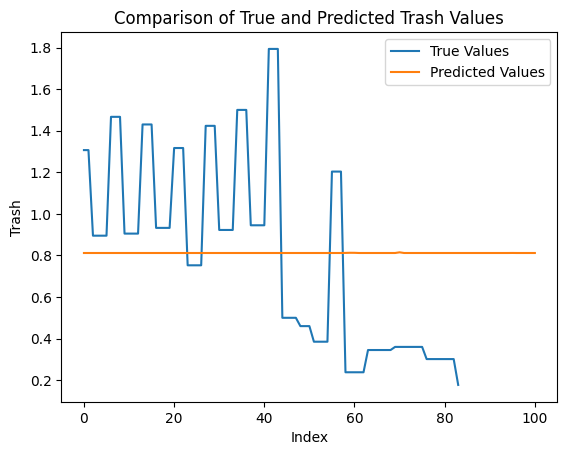

In [ ]:
import matplotlib.pyplot as plt

# Convert predictions and true values to numpy arrays
y_pred = y_pred_tensor.squeeze().numpy()
y_true = y_test_tensor.numpy()

# Create the line plot
fig, ax = plt.subplots()

# Plot the true and predicted values
ax.plot(range(len(y_true)), y_true, label="True Values",)
ax.plot(range(len(y_pred)), y_pred, label="Predicted Values",)

# Add a legend, labels, and a title
ax.legend()
ax.set_xlabel("Index")
ax.set_ylabel("Trash")
ax.set_title("Comparison of True and Predicted Trash Values")

# Show the plot
plt.show()
